####Bismillah
###**Nama : Tia Agustiani**
###**NIM  : I.2111730**

In [97]:
#2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np

In [98]:
#3 Load CIFAR100 datasets

(x_train, x_label), (y_test, y_label) = cifar100.load_data(label_mode='fine')

In [99]:
#4 Nama superclass
indeks_flowers = {
    "orchids": 54,
    "poppies": 62,
    "roses": 70,
    "sunflowers": 82,
    "tulips": 92
}

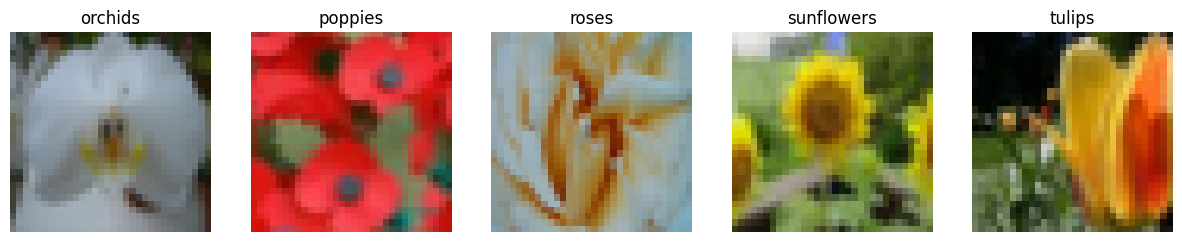

In [100]:
#5 & 6
plt.figure(figsize=(15,3))
for i, (nama_kelas, nama_indeks) in enumerate (indeks_flowers.items()):
   indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
   plt.subplot(1, len(indeks_flowers), i+ 1)
   plt.imshow(x_train[indeks])
   plt.title(nama_kelas)
   plt.axis("off")
plt.show()

In [101]:
#7
indeks2_flowers = [54, 62, 70, 82, 92]

x_train_baru =[]
x_label_baru =[]

for i in indeks2_flowers:
  indeks = np.where(x_label == 1)[0]
  x_train_baru.append(x_train[indeks])
  x_label_baru.append(x_label[indeks])

x_train_baru = np.concatenate(x_train_baru) # tujuannya untuk menggabungkan 2/ lebih array menjadi 1
x_label_baru = np.concatenate(x_label_baru)

In [102]:
x_train_baru.shape

(2500, 32, 32, 3)

In [103]:
x_label_baru.shape

(2500, 1)

In [104]:
#8 CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import datasets, layers, models

In [105]:
model_1_cnn = models.Sequential() #Layers/lappsan dibuat 1 demi 1
model_1_cnn.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3))) #mengolah data gambar dengan jumlah filter sebesar 32, setiap filter 3x3 piksel
model_1_cnn.add(layers.MaxPooling2D((2,2))) #mengurangi dimensi spasial dari gambar, (2,2) mengurangi ukuran gambar menjad setengahnya
model_1_cnn.add(layers.Conv2D(64,(3,3), activation = 'relu')) #mengolah data...
model_1_cnn.add(layers.MaxPooling2D((2,2))) #mengurangi...
model_1_cnn.add(layers.Conv2D(64,(3,3), activation = 'relu')) #mengolah data...

model_1_cnn.add(layers.Flatten()) #mengubah peta fitur 2 dimensi menjadi 1 dimensi
model_1_cnn.add(layers.Dense(64,activation='relu')) #menambah lapisan menjadi 64 jaringan
model_1_cnn.add(layers.Dense(10)) #mengubah lapisan menjadi 10 digit

In [106]:
#9 RCNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [107]:
model_2 = Sequential([
    Conv2D(32,(3,3), padding = "same", activation='relu', input_shape = x_train_baru.shape[1:]),
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,(3,3), padding = "same", activation='relu'),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

###**10. Berikut adalah penjelasan untuk setiap layer yang ada dalam model CNN dan RCNN diatas:**

**1. Conv2D Layer (Convolutional Layer pertama):**

- Fungsi: Melakukan konvolusi pada input menggunakan filter 2D (32 filter) dengan ukuran kernel 3x3.<br>
- Activation Function: ReLU (Rectified Linear Unit) digunakan untuk memperkenalkan non-linearitas.<br>
- Padding: "same" digunakan untuk menjaga ukuran gambar tetap setelah konvolusi.<br>

**2. Conv2D Layer (Convolutional Layer kedua):**

- Fungsi: Melakukan konvolusi pada feature maps hasil dari layer sebelumnya menggunakan filter 2D (32 filter) dengan ukuran kernel 3x3.<br>
- Activation Function: ReLU digunakan kembali.<br>

**3. MaxPooling2D Layer (Pooling Layer pertama):**

- Fungsi: Melakukan max pooling dengan ukuran pool 2x2, yang membantu mengurangi dimensi spasial gambar dan mengurangi jumlah parameter dalam model.<br>

**4. Conv2D Layer (Convolutional Layer ketiga):**

- Fungsi: Melakukan konvolusi pada feature maps hasil dari layer sebelumnya menggunakan filter 2D (64 filter) dengan ukuran kernel 3x3.
- Activation Function: ReLU digunakan kembali.
- Padding: "same" digunakan untuk menjaga ukuran gambar tetap setelah konvolusi.

**5. Conv2D Layer (Convolutional Layer keempat):**

- Fungsi: Melakukan konvolusi pada feature maps hasil dari layer sebelumnya menggunakan filter 2D (64 filter) dengan ukuran kernel 3x3.
Activation Function: ReLU digunakan kembali.

**6. MaxPooling2D Layer (Pooling Layer kedua):**
- Fungsi: Melakukan max pooling dengan ukuran pool 2x2.

**7. Flatten Layer:**
- Fungsi: Meratakan peta fitur 2 dimensi menjadi 1 dimensi. Diperlukan sebelum menjalankan layer fully connected.

**8. Dense Layer (Fully Connected Layer pertama):**

- Fungsi: Menambahkan layer fully connected dengan 512 neuron.
Activation Function: ReLU digunakan.

**9. Dense Layer (Fully Connected Layer kedua):**

- Fungsi: Menambahkan layer fully connected dengan 10 neuron (sesuai dengan jumlah kelas pada output).
- Activation Function: Softmax digunakan untuk menghasilkan probabilitas output untuk masing-masing kelas.

In [108]:
#11
model_1_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='SparseCategoricalCrossentropy',
                  metrics=['accuracy'])

In [109]:
model_1_cnn.fit(x_train_baru,x_label_baru, epochs=10, batch_size=256)

Epoch 1/10
10/10 [==============================] - 5s 420ms/step - loss: 0.8005 - accuracy: 0.1892
Epoch 2/10
10/10 [==============================] - 3s 261ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 3s 345ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 4s 386ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 5s 531ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 3s 354ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 7/10
10/10 [==============================] - 4s 343ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 8/10
10/10 [==============================] - 4s 398ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 9/10
10/10 [==============================] - 4s 424ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 10/10
10/10 [==============================] - 3s 319ms/step -

In [110]:
#12
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [111]:
model_2.fit(x_train_baru,x_label_baru, epochs=10, batch_size=256)

Epoch 1/10
10/10 [==============================] - 13s 1s/step - loss: 3.3731 - accuracy: 0.8976
Epoch 2/10
10/10 [==============================] - 12s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 13s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 10s 906ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 14s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 11s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 10s 995ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 9s 866ms/step - loss: 0.000

In [112]:
# 13
model_1_cnn.save('model_1_cnn.h5')
model_2.save('model_2.h5')

# Muat kembali model
loaded_model_cnn = tf.keras.models.load_model('model_1_cnn.h5')
loaded_model_rcnn = tf.keras.models.load_model('model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [113]:
#14
model_1_cnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_11 (Flatten)        (None, 1024)            

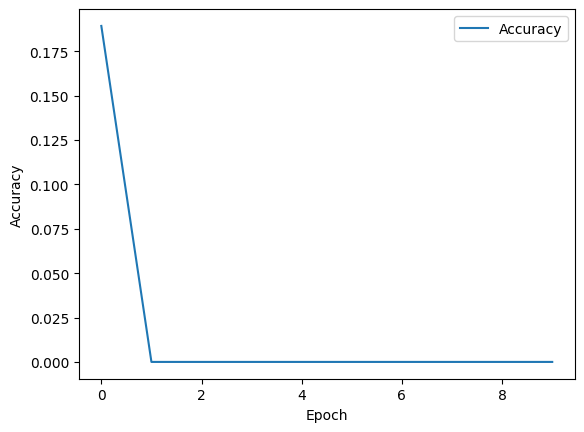

In [114]:
plt.plot(model_1_cnn.history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [115]:
#15
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_43 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                               

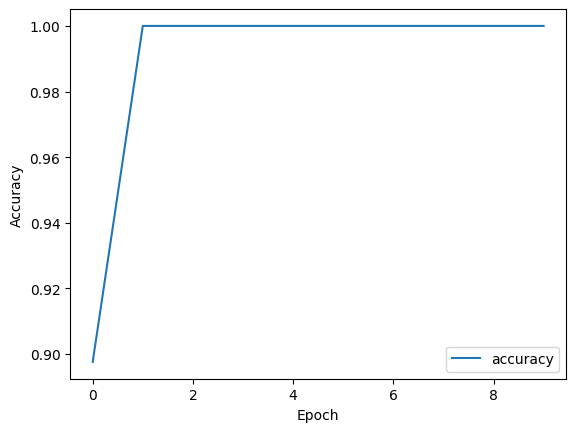

In [116]:
plt.plot(model_2.history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###**16.Kesimpulan** :<br>
Model pertama yaitu model_1_cnn menghasilkan akurasi yang menurut saya kurang jelas.
Begitu pun model kedua yaitu model_2 menghasilkan akurasi yang kurang jelas juga.